# Метод K блиайших соседей
## Цель работы
Изучить работу класса KNeighborsClassifier библиотеки Scikit-Learn, реализующего метод K ближайших соседей для классификации.

## Содержание работы
1. Загрузить датасет "Ирисы" и выбрать в обучающую выборку только первый и третий столбцы в качестве признаков.
2. Проведите минимаксную нормализацию данных.
3. Посроить модель классификации по методу ближайших соседей с k=3 и оценить эффективность этой модели.
4. Создать новое наблюдение, шкалировать его и сделать предсказание на нём. Вывести расстояния до трёх ближайших соседей. Вывести индексы и координаты трёх ближайших соседей. Визуализировать их.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Загрузить датасет "Ирисы" и выбрать в обучающую выборку только первый и третий столбцы в качестве признаков.

In [2]:
from sklearn.datasets import load_iris

In [3]:
iris = load_iris() 
features = iris.data

In [4]:
data = pd.DataFrame(features, columns = iris.feature_names)
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
X = data.iloc[:, [0, 2]]
y = iris.target
X.shape, y.shape

((150, 2), (150,))

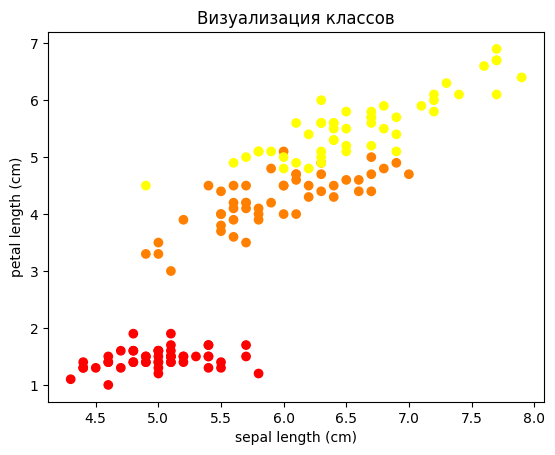

In [6]:
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap='autumn')

plt.title("Визуализация классов")
plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')
plt.show()

### 2. Проведите минимаксную нормализацию данных.

In [7]:
from sklearn.preprocessing import MinMaxScaler

In [8]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

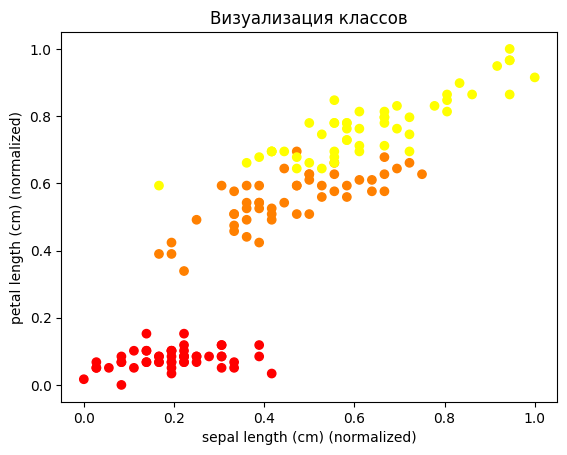

In [9]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap='autumn')

plt.title("Визуализация классов")
plt.xlabel('sepal length (cm) (normalized)')
plt.ylabel('petal length (cm) (normalized)')
plt.show()

### 3. Посроить модель классификации по методу ближайших соседей с k=3 и оценить эффективность этой модели.

In [10]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import confusion_matrix, classification_report

In [11]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_scaled, y)

KNeighborsClassifier(n_neighbors=3)

In [12]:
y_pred = knn.predict(X_scaled)

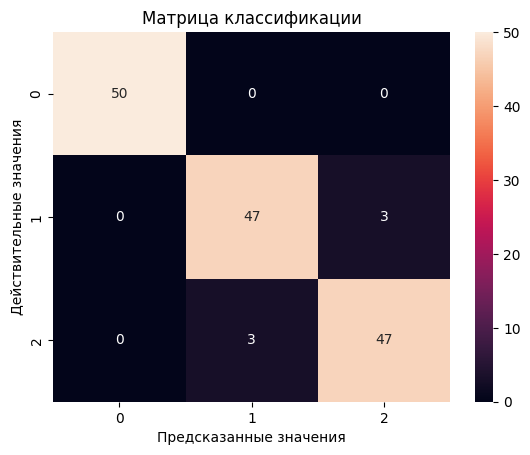

In [13]:
plt.title("Матрица классификации")
sns.heatmap(confusion_matrix(y, y_pred), annot=True, fmt ='d')
plt.ylabel('Действительные значения')
plt.xlabel('Предсказанные значения')
plt.show()

In [14]:
print(classification_report(y_pred, y))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.94      0.94      0.94        50
           2       0.94      0.94      0.94        50

    accuracy                           0.96       150
   macro avg       0.96      0.96      0.96       150
weighted avg       0.96      0.96      0.96       150



In [15]:
X0 = np.linspace(X.iloc[:, 0].min()-1,X.iloc[:, 0].max()+1, X.shape[0])
X1 = np.linspace(X.iloc[:, 1].min()-1,X.iloc[:, 1].max()+1, X.shape[0])

X0_grid, X1_grid = np.meshgrid(X0, X1)

XX = np.array([X0_grid.ravel(), X1_grid.ravel()]).T

In [16]:
XX_scaled = scaler.transform(XX)
Z = knn.predict(XX_scaled).reshape(X0_grid.shape)

c:\Users\sonya\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


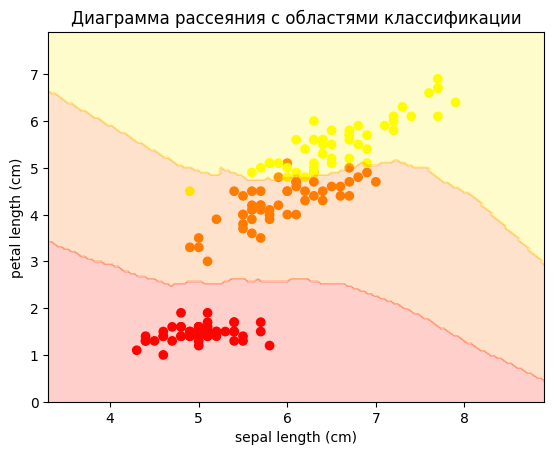

In [17]:
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap='autumn')
plt.contourf(X0_grid, X1_grid, Z, cmap='autumn', alpha=0.2)

plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')
plt.title("Диаграмма рассеяния с областями классификации")
plt.show()

### 4. Создать новое наблюдение, шкалировать его и сделать предсказание на нём. Вывести расстояния до трёх ближайших соседей. Вывести индексы и координаты трёх ближайших соседей. Визуализировать их.

In [18]:
observation_new = [[5.5, 5]]

In [19]:
observation_new_scaled = scaler.transform(observation_new)

c:\Users\sonya\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [20]:
knn.predict(observation_new_scaled)

array([2])

In [21]:
knn.predict_proba(observation_new_scaled)

array([[0., 0., 1.]])

In [22]:
distances, indices = knn.kneighbors(observation_new_scaled)

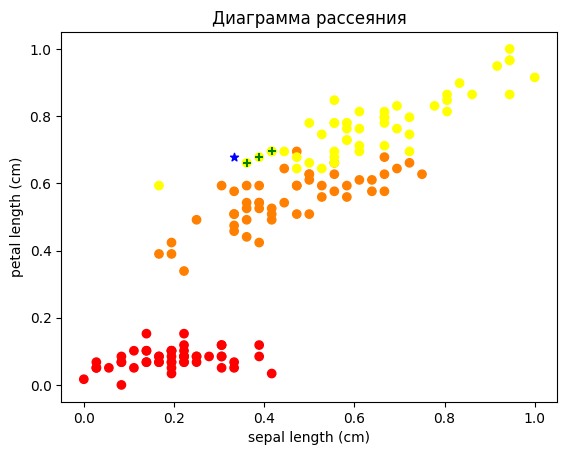

In [23]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap='autumn')

plt.scatter(observation_new_scaled[0][0], observation_new_scaled[0][1], marker='*', color='b')

plt.scatter(X_scaled[indices[0]][0][0], X_scaled[indices[0]][0][1], marker='+', color='g')
plt.scatter(X_scaled[indices[0]][1][0], X_scaled[indices[0]][1][1], marker='+', color='g')
plt.scatter(X_scaled[indices[0]][2][0], X_scaled[indices[0]][2][1], marker='+', color='g')

plt.title("Диаграмма рассеяния")
plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')
plt.show()